# Research Notebook

## 1. Make an input file
* In the same directory as this Jupyter notebook, there must be a template input file (the default name is qpinput_template.json) and two python files: mkQPinput.py and pyVisQP.py

* For the 'Units', if 'Normalized' is selected, then all the length will be in the normalized units, and the last box will be $n_{peak}/n_p$. If 'Experimental' is selected, then all the length will have the unit of $\mu m$, and the last box will be the total charge of the beam (in $nC$).

In [26]:
from importlib import reload
import mkQPinput
mkQPinput = reload(mkQPinput)
mkQPinput.makeWidgetsForInput()

interactive(children=(Text(value='qpinput_template.json', description='Template Input File:', layout=Layout(wi…

## 2. Run QuickPIC simulation

In [2]:
# Open a terminal and run the following lines (or something like that. For a large simulatoin, submit a batch script):
# salloc -N 1 -C haswell -q interactive -t 01:00:00
# srun -n 32 -c 2 --cpu_bind=cores qpic.initialDump.e

32


256

## 3. Visualize the output data
### 1. Plasma and beam density

In [27]:
ndump = 20

In [28]:
from importlib import reload
import pyVisQP

pyVisQP = reload(pyVisQP)

dirname = '..'

# Plot the charge density of plasma and beam
filename1 = dirname +'/Species0001/Charge_slice_0001/charge_slice_xz_'+str(ndump).zfill(8)+'.h5'
filename2 = dirname +'/Beam0001/Charge_slice_0001/charge_slice_xz_'+str(ndump).zfill(8)+'.h5'
filenameList = [filename1,filename2]
scaleList = [1,1]
pyVisQP.makeplot(filenameList,scaleList,LineoutDir = None)

filename1 = dirname +'/Species0001/Charge_slice_0002/charge_slice_yz_'+str(ndump).zfill(8)+'.h5'
filename2 = dirname +'/Beam0001/Charge_slice_0002/charge_slice_yz_'+str(ndump).zfill(8)+'.h5'
filenameList = [filename1,filename2]
scaleList = [1,1]
pyVisQP.makeplot(filenameList,scaleList,LineoutDir = None)

interactive(children=(FloatRangeSlider(value=(-5.0, 0.0), continuous_update=False, description='Colorbar:', ma…

interactive(children=(FloatRangeSlider(value=(-5.0, 0.0), continuous_update=False, description='Colorbar:', ma…

### 2. Accelerating field: $E_z$

In [4]:
# Plot the accelerating field with transverse lineout
filename = dirname +'/Fields/Ez_slice0001/ezslicexz_'+str(ndump).zfill(8)+'.h5'
filenameList = [filename]
pyVisQP.makeplot(filenameList,LineoutDir = 'longitudinal',specify_title = '$E_z \; [mc\omega_p / e]$')
pyVisQP.makeplot(filenameList,LineoutDir = 'transverse',specify_title = '$E_z \; [mc\omega_p / e]$')

interactive(children=(FloatRangeSlider(value=(-1.0, 1.0), continuous_update=False, description='Colorbar:', ma…

interactive(children=(FloatRangeSlider(value=(-1.0, 1.0), continuous_update=False, description='Colorbar:', ma…

### 3. Focusing force

In [5]:
# Plot the x component of the focusing force : Fx with transverse and longitudinal lineout
filename1 = dirname + '/Fields/Ex_slice0001/exslicexz_'+str(ndump).zfill(8)+'.h5'
filename2 = dirname + '/Fields/By_slice0001/byslicexz_'+str(ndump).zfill(8)+'.h5'
filenameList = [filename1,filename2]
scaleList = [-1,1]
pyVisQP.makeplot(filenameList,scaleList,LineoutDir = 'transverse',specify_title = '$F_x \; [mc\omega_p]$',Show_theory = 'focus')
pyVisQP.makeplot(filenameList,scaleList,LineoutDir = 'longitudinal',specify_title = '$F_x \; [mc\omega_p]$',Show_theory = 'focus')

interactive(children=(FloatRangeSlider(value=(-1.0, 1.0), continuous_update=False, description='Colorbar:', ma…

interactive(children=(FloatRangeSlider(value=(-1.0, 1.0), continuous_update=False, description='Colorbar:', ma…

In [40]:
ndump = 20
last_file_number = 1680

In [41]:
pyVisQP = reload(pyVisQP)
parameters = pyVisQP.analyze_beam_bata(ndump = ndump, last_file_number = last_file_number,
                                       first_file_number = 0,beam_number = 2, 
                                       zVisualizeCenter = 0, halfThickness = 2)

In file ../Beam0002/Raw/raw_00000000.h5, analyzing  95.4683087384173 % particles
In file ../Beam0002/Raw/raw_00000020.h5, analyzing  95.46031087539355 % particles
In file ../Beam0002/Raw/raw_00000040.h5, analyzing  95.45495726933846 % particles
In file ../Beam0002/Raw/raw_00000060.h5, analyzing  95.45250805261439 % particles
In file ../Beam0002/Raw/raw_00000080.h5, analyzing  95.45430161683906 % particles
In file ../Beam0002/Raw/raw_00000100.h5, analyzing  95.45715723042517 % particles
In file ../Beam0002/Raw/raw_00000120.h5, analyzing  95.45537450274718 % particles
In file ../Beam0002/Raw/raw_00000140.h5, analyzing  95.46324233274007 % particles
In file ../Beam0002/Raw/raw_00000160.h5, analyzing  95.47158700091434 % particles
In file ../Beam0002/Raw/raw_00000180.h5, analyzing  95.46949543307687 % particles
In file ../Beam0002/Raw/raw_00000200.h5, analyzing  95.46669400542166 % particles
In file ../Beam0002/Raw/raw_00000220.h5, analyzing  95.4631773196417 % particles
In file ../Beam000

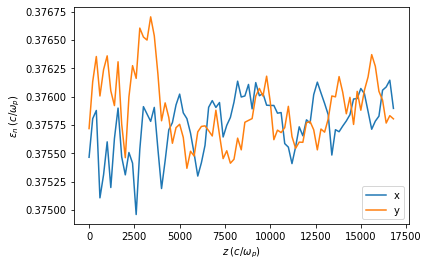

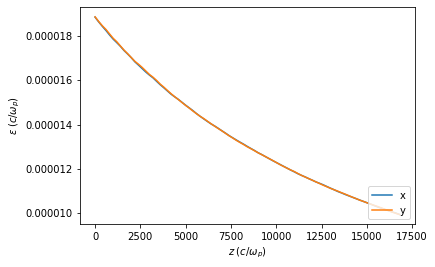

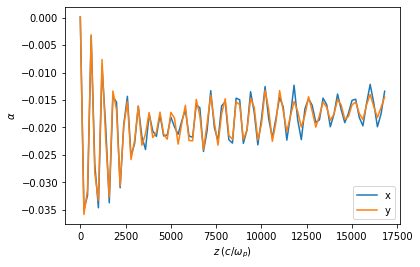

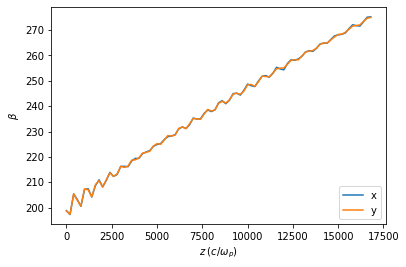

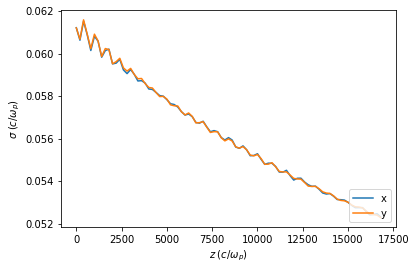

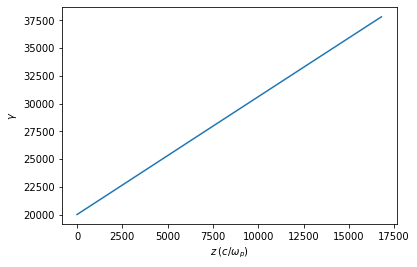

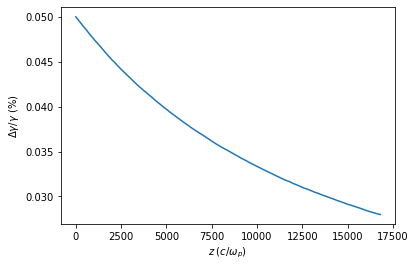

In [42]:
import matplotlib.pyplot as plt
plt.plot(parameters['s'], parameters['epsilon_n_x'],label='x')
plt.plot(parameters['s'], parameters['epsilon_n_y'],label='y')
plt.xlabel('$z\;(c/\omega_p)$')
plt.ylabel('$\epsilon_n \;(c/\omega_p)$')
plt.legend(loc='lower right')
plt.show()

plt.plot(parameters['s'], parameters['epsilon_x'],label='x')
plt.plot(parameters['s'], parameters['epsilon_y'],label='y')
plt.xlabel('$z\;(c/\omega_p)$')
plt.ylabel('$\epsilon \;(c/\omega_p)$')
plt.legend(loc='lower right')
plt.show()

plt.plot(parameters['s'], parameters['alpha_x'],label='x')
plt.plot(parameters['s'], parameters['alpha_y'],label='y')
plt.xlabel('$z\;(c/\omega_p)$')
plt.ylabel('$\\alpha$')
plt.legend(loc='lower right')
plt.show()

plt.plot(parameters['s'], parameters['beta_x'],label='x')
plt.plot(parameters['s'], parameters['beta_y'],label='y')
plt.xlabel('$z\;(c/\omega_p)$')
plt.ylabel('$\\beta$')
plt.legend(loc='lower right')
plt.show()

plt.plot(parameters['s'], parameters['sigma_x'],label='x')
plt.plot(parameters['s'], parameters['sigma_y'],label='y')
plt.xlabel('$z\;(c/\omega_p)$')
plt.ylabel('$\sigma \;(c/\omega_p)$')
plt.legend(loc='lower right')
plt.show()

plt.plot(parameters['s'], parameters['energy'])
plt.xlabel('$z\;(c/\omega_p)$')
plt.ylabel('$\gamma $')
plt.show()

plt.plot(parameters['s'], parameters['energy_spread'])
plt.xlabel('$z\;(c/\omega_p)$')
plt.ylabel('$\Delta \gamma /\gamma$ (%)')
plt.show()